In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [55]:
# Read the dataset
df = pd.read_csv("G:/internship/code-clause/Stock Market Prediction/NSE-TATAGLOBAL11.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [56]:
# About Dataset
df.describe()
df.head()
df.tail()
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

2018-10-08    1
2015-06-15    1
2015-06-04    1
2015-06-05    1
2015-06-08    1
             ..
2017-02-09    1
2017-02-10    1
2017-02-13    1
2017-02-14    1
2013-10-08    1
Name: Date, Length: 1235, dtype: int64

<Figure size 1440x576 with 0 Axes>

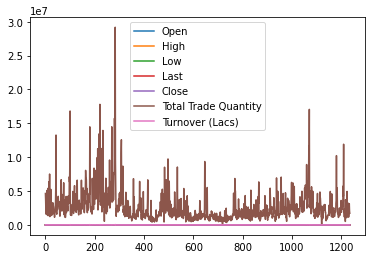

In [57]:
# Data Visualization
plt.figure(figsize=(20,8))
df.plot()
df['Date'].value_counts()

In [37]:
# Converting int64 dtype to datetime64 dtype
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2018-10-08
1      2018-10-05
2      2018-10-04
3      2018-10-03
4      2018-10-01
          ...    
1230   2013-10-14
1231   2013-10-11
1232   2013-10-10
1233   2013-10-09
1234   2013-10-08
Name: Date, Length: 1235, dtype: datetime64[ns]

In [38]:
# Sorting dataset with respect to dates
df = df.sort_values(by="Date")
df
df.reset_index(inplace=True)
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...,...
1230,4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
1231,3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
1232,2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1233,1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


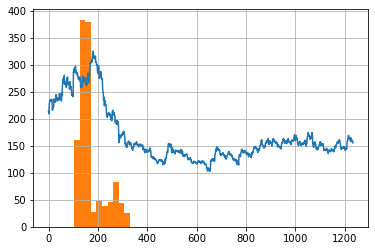

In [58]:
# Data Preprocessing
plt.plot(df['Close'])
df['High'].hist()
d1 = df['Close']

In [40]:
# Performing feature scaling on d1
scaler = MinMaxScaler(feature_range=(0,1))
d1 = scaler.fit_transform(np.array(d1).reshape(-1,1))
d1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [64]:
# Train-Test Split
d1 = np.array(d1)
training_size = int(len(d1) * 0.70)
test_size = len(d1) - training_size
train_data = d1[0:training_size]
test_data = d1[training_size:]


In [65]:
train_data

array([215.15, 209.2 , 218.2 , 227.6 , 230.9 , 233.75, 233.25, 234.25,
       236.1 , 233.3 , 234.6 , 234.9 , 235.05, 236.6 , 233.95, 222.65,
       216.  , 222.  , 222.95, 221.05, 222.4 , 223.7 , 236.7 , 234.3 ,
       236.  , 234.55, 233.35, 237.05, 231.  , 235.45, 240.55, 245.15,
       243.  , 239.35, 237.55, 234.55, 233.55, 237.3 , 236.35, 237.6 ,
       239.5 , 234.65, 235.45, 235.65, 246.9 , 242.2 , 242.25, 239.1 ,
       236.9 , 246.3 , 243.3 , 238.6 , 233.1 , 238.65, 247.9 , 243.25,
       258.9 , 265.2 , 269.8 , 274.75, 275.25, 266.3 , 271.25, 277.3 ,
       281.  , 264.45, 269.35, 263.95, 265.6 , 267.35, 264.5 , 262.1 ,
       258.2 , 260.85, 267.05, 275.35, 272.15, 277.8 , 269.6 , 267.6 ,
       263.7 , 266.95, 267.1 , 265.75, 263.75, 255.25, 263.25, 269.2 ,
       264.5 , 257.5 , 260.65, 257.85, 254.5 , 250.2 , 247.15, 243.55,
       244.7 , 247.5 , 241.1 , 242.65, 255.9 , 287.5 , 285.25, 292.  ,
       289.7 , 294.2 , 287.8 , 286.65, 292.75, 297.55, 292.1 , 291.2 ,
      

In [66]:
test_data

array([161.5 , 161.2 , 152.05, 151.6 , 151.1 , 151.45, 151.1 , 148.8 ,
       149.75, 145.75, 147.3 , 149.  , 147.95, 147.2 , 149.95, 153.85,
       155.85, 156.7 , 154.75, 154.85, 160.  , 157.85, 157.25, 159.05,
       159.3 , 158.35, 163.55, 158.35, 154.9 , 156.05, 152.55, 153.5 ,
       155.55, 155.95, 159.7 , 157.  , 156.85, 155.15, 157.4 , 155.2 ,
       154.35, 151.55, 149.55, 152.4 , 154.75, 158.55, 160.45, 163.6 ,
       158.7 , 158.25, 158.75, 159.4 , 161.15, 158.85, 158.  , 156.35,
       156.55, 154.3 , 155.65, 154.85, 155.25, 157.35, 155.6 , 153.7 ,
       148.45, 148.15, 152.95, 152.5 , 150.7 , 150.95, 149.05, 148.65,
       146.85, 146.9 , 148.3 , 147.5 , 147.4 , 147.5 , 145.  , 144.25,
       151.6 , 152.95, 155.65, 156.  , 154.85, 158.3 , 161.1 , 163.4 ,
       163.25, 163.35, 159.55, 161.3 , 161.  , 155.3 , 154.2 , 156.95,
       156.75, 156.95, 157.85, 159.4 , 159.9 , 155.25, 154.2 , 155.85,
       158.25, 157.75, 160.9 , 161.65, 163.75, 160.1 , 157.45, 157.3 ,
      

In [76]:
# Dataset Creation Function
def datasetcrtd(dataset, time_step):
    datax, datay = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step)]
        datax.append(a)
        datay.append(dataset[i + time_step])
    return np.array(datax), np.array(datay)
time_step = 100
x_train, y_train = datasetcrtd(train_data, time_step)
x_test, y_test = datasetcrtd(test_data, time_step)

x_train.shape
y_train.shape

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [77]:
# LSTM Model Building
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Model Training
model.fit(x_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
11/11 [==============================] - 7s 252ms/step - loss: 31494.1660 - val_loss: 18802.0254
Epoch 2/60
11/11 [==============================] - 1s 131ms/step - loss: 30437.7930 - val_loss: 18047.4473
Epoch 3/60
11/11 [==============================] - 1s 136ms/step - loss: 29612.0371 - val_loss: 17463.4863
Epoch 4/60
11/11 [==============================] - 1s 129ms/step - loss: 28996.8633 - val_loss: 17058.4648
Epoch 5/60
11/11 [==============================] - 1s 131ms/step - loss: 28598.8867 - val_loss: 16805.2754
Epoch 6/60
11/11 [==============================] - 1s 131ms/step - loss: 28327.6328 - val_loss: 16606.4004
Epoch 7/60
11/11 [==============================] - 1s 131ms/step - loss: 28095.9941 - val_loss: 16425.1211
Epoch 8/60
11/11 [==============================] - 1s 133ms/step - loss: 27873.3672 - val_loss: 16240.5840
Epoch 9/60
11/11 [==============================] - 1s 131ms/step - loss: 27654.1875 - val_loss: 16067.6670
Epoch 10/60
11/11 [=========

In [79]:
# Model Prediction
test_predict = model.predict(x_test)
test_predict1 = scaler.inverse_transform(test_predict)
math.sqrt(mean_squared_error(y_test, test_predict))


9/9 [==============================] - 1s 28ms/step


112.23944251743895

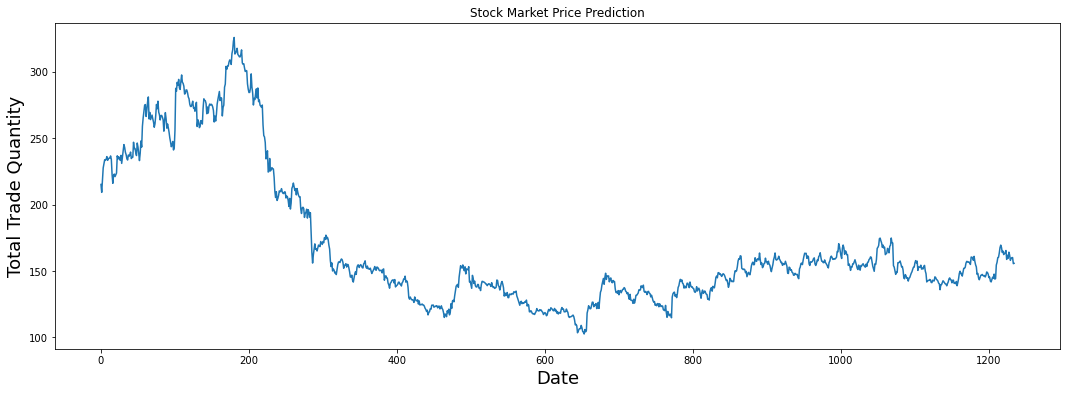

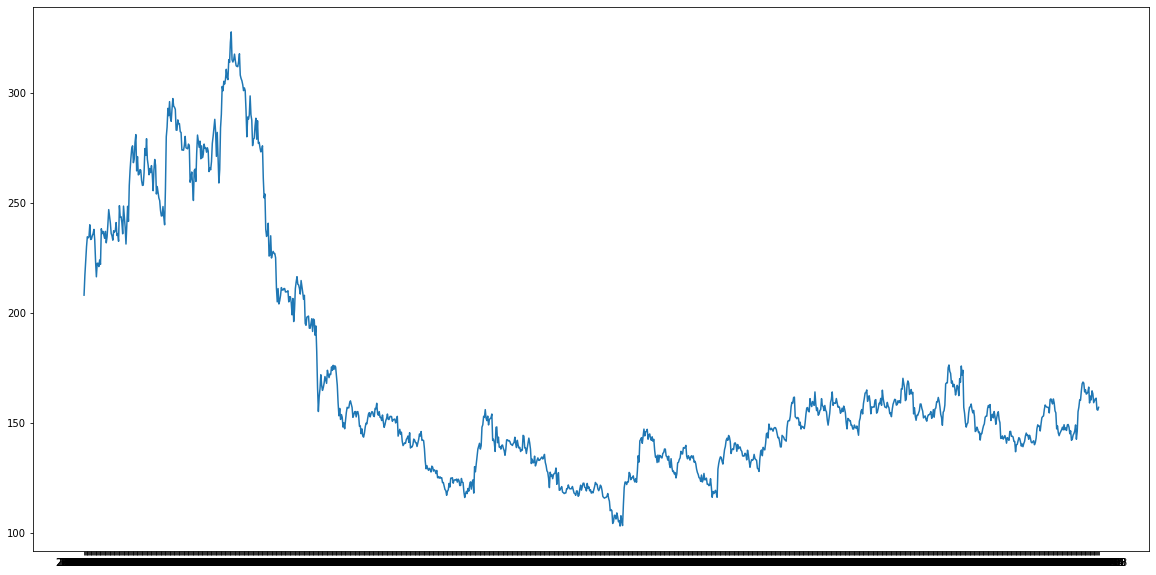

In [83]:
# Additional Visualizations
df_testing_complete = pd.read_csv("G:/internship/code-clause/Stock Market Prediction/NSE-TATAGLOBAL11.csv")
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(df_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

df.index = df['Date']
plt.figure(figsize=(20, 10))
plt.plot(df["Open"], label='ClosePriceHist')



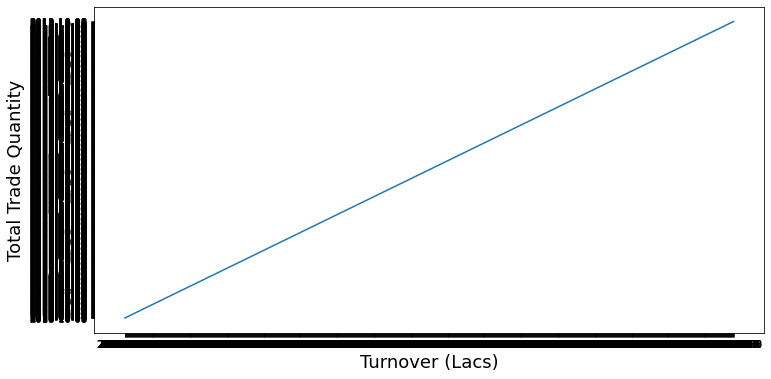

In [84]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

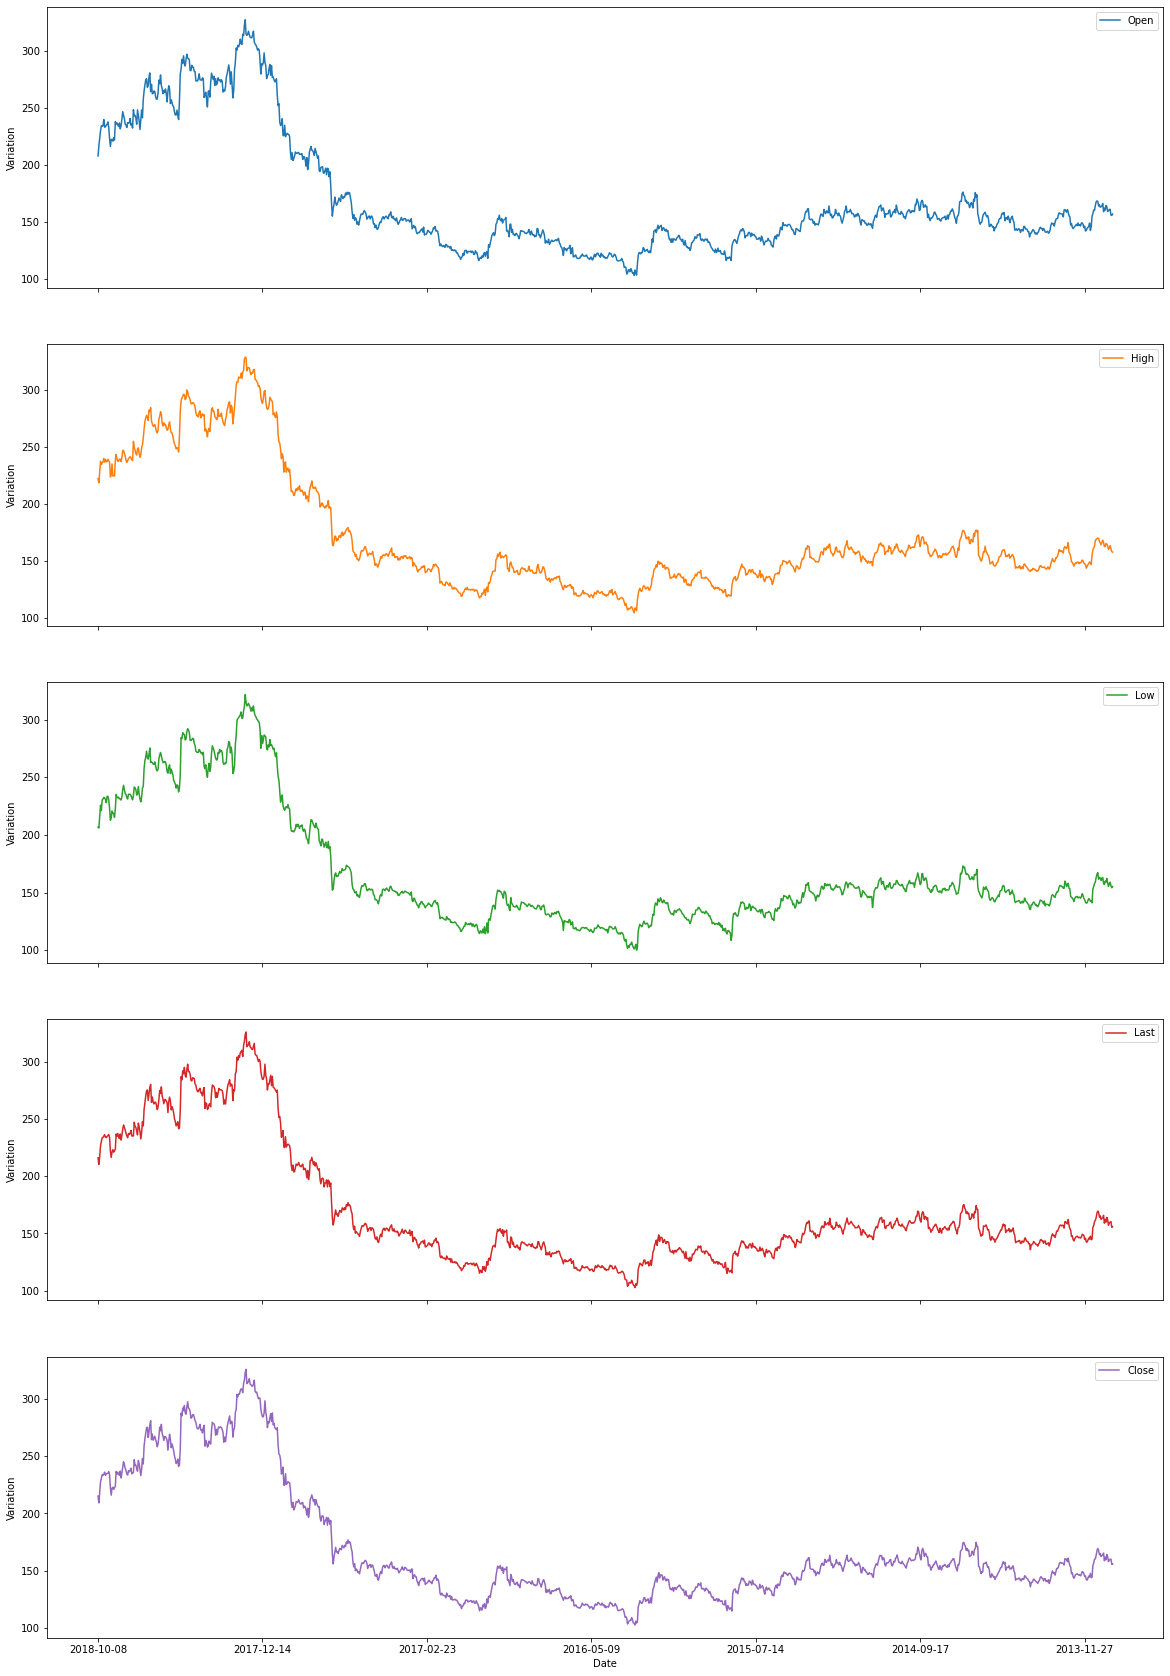

In [81]:
# Subplot Visualization
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha=1, figsize=(20, 30), subplots=True)
for i in axes:
    i.set_ylabel('Variation')